<a href="https://colab.research.google.com/github/cwave-org/MODU/blob/main/map_visualization_toilet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
%pip install geopandas

from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import geopandas as gpd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import folium
from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster
from shapely.geometry import Polygon, Point
import json

%matplotlib inline

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 5.2 MB/s 
     |████████████████████████████████| 16.7 MB 50.9 MB/s 
     |████████████████████████████████| 6.3 MB 29.2 MB/s 
Mounted at /content/drive


In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 29 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (8,135 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletyp

In [1]:
# 한글 font 설정
import platform
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

#matplotlib 패키지 한글 깨짐 처리 시작
#------------------------------------------------------------------------------------
# 운영체제별 한글 폰트 설정

if platform.system() == 'Darwin': # Mac 환경 폰트 설정
    print("mac")
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows': # Windows 환경 폰트 설정
    print("windows") # 자동으로 알아서 설정
    plt.rc('font', family='Malgun Gothic')
  
plt.rcParams['axes.unicode_minus'] = False #한글 폰트 사용시 마이너스 폰트 깨짐 해결

#------------------------------------------------------------------------------------
#matplotlib 패키지 한글 깨짐 처리 끝

# windows -> 주석처리 해야지 한글 제대로 나옴
#plt.rcParams['font.family'] = "NanumBarunGothic"
#plt.rcParams['axes.unicode_minus'] = False

# apple 사용자는
#plt.rc("font", family="AppleGothic")
#plt.rc("axes", unicode_minus=False)

In [5]:
df = pd.read_excel('/content/drive/MyDrive/데이터포럼/Toilet_Data/12_04_01_E_공중화장실정보.xlsx')
print(df.head(5))
print(df.shape)

/usr/local/lib/python3.7/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


   번호     구분                     화장실명             소재지도로명주소 소재지지번주소 남녀공용화장실여부  \
0   1  공중화장실     인왕산 청운지구(1)(서시정 화장실)    서울특별시 종로구 청운동 7-2     NaN         N   
1   2  공중화장실    인왕산 청운지구(2)(청운공원 화장실)    서울특별시 종로구 청운동 7-3     NaN         N   
2   3  공중화장실  창의문안내소 공중화장실(창의문 안내소 앞)  서울특별시 종로구 청운동 산 1-1     NaN         N   
3   4  공중화장실            삼청근린공원(관리실 옆)   서울특별시 종로구 삼청동 산2-1     NaN         N   
4   5  공중화장실            삼청근린공원(약수터 위)   서울특별시 종로구 삼청동 산2-1     NaN         N   

   남성용-대변기수  남성용-소변기수  남성용-장애인용대변기수  남성용-장애인용소변기수  ...  화장실소유구분  화장실설치장소유형  \
0         1         2             1             1  ...   지방자치단체    관광·체육시설   
1         2         3             1             0  ...   지방자치단체    관광·체육시설   
2         2         3             1             0  ...   지방자치단체    관광·체육시설   
3         2         4             1             1  ...   지방자치단체    관광·체육시설   
4         3         4             1             1  ...   지방자치단체    관광·체육시설   

   오물처리방식  비상벨설치여부  비상벨설치장소 화장실입구CCTV설치유무 기저귀교환대유무

In [6]:
df.info()
df['소재지도로명주소'].count()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5109 entries, 0 to 5108
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   번호             5109 non-null   int64  
 1   구분             5109 non-null   object 
 2   화장실명           5109 non-null   object 
 3   소재지도로명주소       4939 non-null   object 
 4   소재지지번주소        3047 non-null   object 
 5   남녀공용화장실여부      5109 non-null   object 
 6   남성용-대변기수       5109 non-null   int64  
 7   남성용-소변기수       5109 non-null   int64  
 8   남성용-장애인용대변기수   5109 non-null   int64  
 9   남성용-장애인용소변기수   5109 non-null   int64  
 10  남성용-어린이용대변기수   5109 non-null   int64  
 11  남성용-어린이용소변기수   5109 non-null   int64  
 12  여성용-대변기수       5109 non-null   int64  
 13  여성용-장애인용대변기수   5109 non-null   int64  
 14  여성용-어린이용대변기수   5109 non-null   int64  
 15  관리기관명          5109 non-null   object 
 16  전화번호           3930 non-null   object 
 17  개방시간           5109 non-null   object 
 18  설치연월    

4939

In [7]:
df['화장실입구CCTV설치유무'].value_counts()

N    3732
Y    1377
Name: 화장실입구CCTV설치유무, dtype: int64

In [8]:
df['기저귀교환대유무'].value_counts()

N    3695
Y    1414
Name: 기저귀교환대유무, dtype: int64

In [9]:
df['비상벨설치여부'].value_counts()

# import matplotlib.pyplot as plt
# plt.pie(df['비상벨설치여부'])
# plt.show()

N    2861
Y    2248
Name: 비상벨설치여부, dtype: int64

In [10]:
df.isnull()

,번호,구분,화장실명,소재지도로명주소,소재지지번주소,남녀공용화장실여부,남성용-대변기수,남성용-소변기수,남성용-장애인용대변기수,남성용-장애인용소변기수,...,화장실소유구분,화장실설치장소유형,오물처리방식,비상벨설치여부,비상벨설치장소,화장실입구CCTV설치유무,기저귀교환대유무,기저귀교환대장소,리모델링연월,데이터기준일자
0,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,True,False,False,True,True,False
1,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
2,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,True,False,False,True,True,False
3,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
4,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
5105,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
5106,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
5107,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


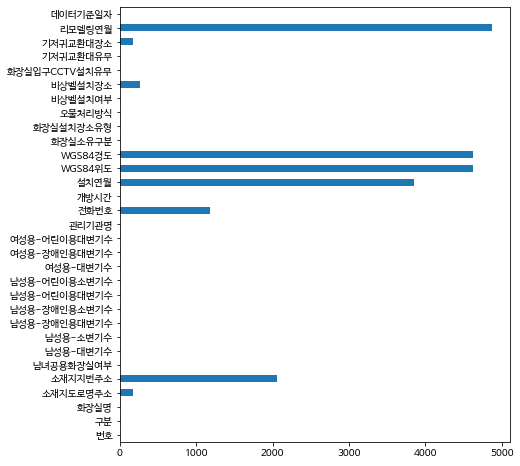

In [11]:
df.isnull().sum().plot.barh(figsize=(7,8))

In [17]:
df_loc=df.loc[:,['구분', '화장실명', '소재지도로명주소']]
df_loc.shape

(5109, 3)

In [18]:
df_loc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5109 entries, 0 to 5108
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   구분        5109 non-null   object
 1   화장실명      5109 non-null   object
 2   소재지도로명주소  4939 non-null   object
dtypes: object(3)
memory usage: 119.9+ KB


In [19]:
df_loc['소재지도로명주소'].unique()

array(['서울특별시 종로구 청운동 7-2', '서울특별시 종로구 청운동 7-3', '서울특별시 종로구 청운동 산 1-1',
       ..., '서울특별시 강서구 양천로57길 37', '서울특별시 강서구 양천로57길 36',
       '서울특별시 강서구 양천로59길 16-9'], dtype=object)

In [113]:
gu_name = ["강남구", "강동구", "강북구", "강서구", "관악구",
           "광진구", "구로구", "금천구", "노원구", "도봉구",
           "동대문구", "동작구", "마포구", "서대문구", "서초구",
           "성동구", "성북구", "송파구", "양천구", "영등포구",
           "용산구", "은평구", "종로구", "중구", "중랑구"]
gu_count = [0,0,0,0,0,
            0,0,0,0,0,
            0,0,0,0,0,
            0,0,0,0,0,
            0,0,0,0,0] 
for i in range(len(gu_name)): 
  df_cafe = df[df['소재지도로명주소'].str.contains(gu_name[i], na=False)].copy()
  print(gu_name[i], df_cafe.shape[0])
  gu_count[i] = df_cafe.shape[0]


강남구 0
강동구 59
강북구 79
강서구 170
관악구 134
광진구 181
구로구 172
금천구 68
노원구 185
도봉구 136
동대문구 63
동작구 152
마포구 181
서대문구 133
서초구 457
성동구 116
성북구 174
송파구 394
양천구 163
영등포구 292
용산구 543
은평구 201
종로구 191
중구 225
중랑구 93


In [114]:
gu_latitude = [0,0,0,0,0,
            0,0,0,0,0,
            0,0,0,0,0,
            0,0,0,0,0,
            0,0,0,0,0] 
gu_longitude = [0,0,0,0,0,
            0,0,0,0,0,
            0,0,0,0,0,
            0,0,0,0,0,
            0,0,0,0,0] 
gu_loc = [[127.049555555555, 37.514575], [127.125863888888, 37.5273666666666], [127.027719444444, 37.6369555555555], [126.851675, 37.5481555555555], [126.953844444444, 37.4753861111111],
[127.084533333333, 37.5357388888888], [126.889597222222, 37.49265], [126.904197222222, 37.4491083333333], [127.058388888888, 37.6514611111111], [127.049522222222, 37.6658333333333],
[127.042141666666, 37.571625], [126.941575, 37.5096555555555], [126.910530555555, 37.5607055555555], [126.938897222222, 37.5763666666666], [127.034811111111, 37.4807861111111],
[127.039, 37.5606111111111], [127.020333333333, 37.5863833333333], [127.107930555555, 37.5117555555555], [126.868708333333, 37.5142305555555], [126.898341666666, 37.5236111111111],
[126.967522222222, 37.5360944444444], [126.931241666666, 37.5999694444444], [126.981641666666, 37.5703777777777], [126.999641666666, 37.5610027777777], [127.094777777777, 37.6038055555555]]

for i in range(len(gu_loc)):
  gu_latitude[i] = gu_loc[i][1]
  gu_longitude[i] = gu_loc[i][0]

In [115]:
# merge_inner = pd.merge(gu_name, gu_count)
# print(merge_inner)

df_map = pd.DataFrame(
    {'위치': gu_name,
     '갯수': gu_count,
     '경도': gu_longitude,
     '위도': gu_latitude}
)
df_map

,위치,갯수,경도,위도
0,강남구,0,127.049556,37.514575
1,강동구,59,127.125864,37.527367
2,강북구,79,127.027719,37.636956
3,강서구,170,126.851675,37.548156
4,관악구,134,126.953844,37.475386
5,광진구,181,127.084533,37.535739
6,구로구,172,126.889597,37.492650
7,금천구,68,126.904197,37.449108
8,노원구,185,127.058389,37.651461
9,도봉구,136,127.049522,37.665833


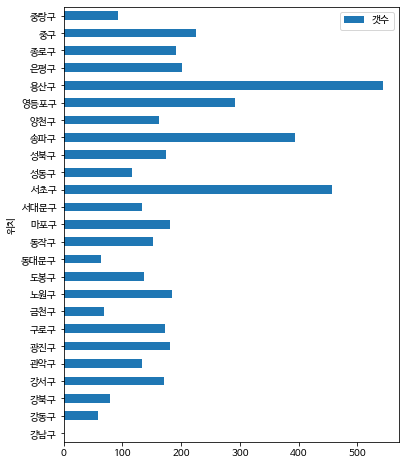

In [116]:
df_check = df_map.pivot_table(index = '위치', aggfunc = 'mean', values = '갯수') # 조사지점당 평균유동인구수
df_check.plot(kind='barh', figsize=(6,8))


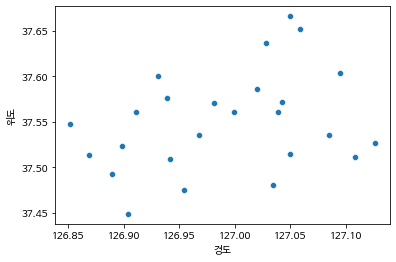

In [99]:
import seaborn as sns
# 어느 지역에 어떤 카페브랜드가 더 많는지 보여주는 시각화
# 산점도(scatter 플롯) 점들이 여기저기 흩어진 모양의 그래프
# 수치들을 좌표로 표시해서 산개한 것을 말함

sns.scatterplot(data=df_map, x='경도', y='위도', markers='markers')

In [106]:
lat = df_map["위도"].mean()
long = df_map["경도"].mean()
lat,long

(37.55056844444441, 126.99087966666625)

In [103]:
geo_path = '/content/drive/MyDrive/데이터포럼/Toilet_Data/02. skorea_municipalities_geo_simple.json'

import json
geo_json = json.load(open(geo_path, encoding='utf-8'))
geo_json['features'][0]['properties']['name']

'강동구'

In [131]:
lat =37.54161442276763
long = 126.98894285435154
lat, long 

m = folium.Map([lat, long], zoom_start=11.4)

folium.Choropleth(
    geo_data=geo_json,
    name='choropleth',
    data=df_map,
    columns=['위치', '갯수'],
    key_on='feature.properties.name',
    fill_color='YlGnBu', #YlGnBu
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='서울시 화장실 갯수'
).add_to(m)

m

In [6]:
# x좌표(위도),y좌표(경도) 리스트로 만들기
x = []
y = []
g = []
for i in range(len(df['x'])):
    if df['x'][i] == 0.0 or df['y'][i] == 0.0:
        pass
    else:
        x.append(df['x'][i])
        y.append(df['y'][i])
        g.append(df["gu"][i])
print('x갯수: ',len(x))
print('y갯수: ',len(y))
print('gu갯수: ',len(g))

x갯수:  4586
y갯수:  4586
gu갯수:  4586


In [7]:
gu = [[0, 0], [1, 0], [2, 0], [3, 0], [4, 0],
      [5, 0], [6, 0], [7, 0], [8, 0], [9, 0],
      [10, 0], [11, 0], [12, 0], [13, 0], [14, 0],
      [15, 0], [16, 0], [17, 0], [18, 0], [19, 0],
      [20, 0], [21, 0], [22, 0], [23, 0], [24, 0]]
for i in range(len(g)):
  g[i]
  if (g[i] == "강남구"):
    gu[0][1] += 1
  if (g[i] == "강동구"):
    gu[1][1] += 1
  if (g[i] == "강북구"):
    gu[2][1] += 1
  if (g[i] == "강서구"):
    gu[3][1] += 1
  if (g[i] == "관악구"):
    gu[4][1] += 1
  if (g[i] == "광진구"):
    gu[5][1] += 1
  if (g[i] == "구로구"):
    gu[6][1] += 1
  if (g[i] == "금천구"):
    gu[7][1] += 1
  if (g[i] == "노원구"):
    gu[8][1] += 1
  if (g[i] == "도봉구"):
    gu[9][1] += 1
  if (g[i] == "동대문구"):
    gu[10][1] += 1
  if (g[i] == "동작구"):
    gu[11][1] += 1
  if (g[i] == "마포구"):
    gu[12][1] += 1
  if (g[i] == "서대문구"):
    gu[13][1] += 1
  if (g[i] == "서초구"):
    gu[14][1] += 1
  if (g[i] == "성동구"):
    gu[15][1] += 1
  if (g[i] == "성북구"):
    gu[16][1] += 1
  if (g[i] == "송파구"):
    gu[17][1] += 1
  if (g[i] == "양천구"):
    gu[18][1] += 1
  if (g[i] == "영등포구"):
    gu[19][1] += 1
  if (g[i] == "용산구"):
    gu[20][1] += 1
  if (g[i] == "은평구"):
    gu[21][1] += 1
  if (g[i] == "종로구"):
    gu[22][1] += 1
  if (g[i] == "중구"):
    gu[23][1] += 1
  if (g[i] == "중랑구"):
    gu[24][1] += 1

gu

dfgu = pd.DataFrame(data=gu, index=range(0,25), columns=['구명', '화장실개수'])
gu_data = pd.concat([dfgu], axis = 0)
gu_data


,구명,화장실개수
0,0,292
1,1,188
2,2,72
3,3,212
4,4,145
5,5,181
6,6,129
7,7,141
8,8,207
9,9,121


In [ ]:
gu_loc = [[127.049555555555, 37.514575], [127.125863888888, 37.5273666666666], [127.027719444444, 37.6369555555555], [126.851675, 37.5481555555555], [126.953844444444, 37.4753861111111],
      [127.084533333333, 37.5357388888888], [126.889597222222, 37.49265], [126.904197222222, 37.4491083333333], [127.058388888888, 37.6514611111111], [127.049522222222, 37.6658333333333],
      [127.042141666666, 37.571625], [126.941575, 37.5096555555555], [126.910530555555, 37.5607055555555], [126.938897222222, 37.5763666666666], [127.034811111111, 37.4807861111111],
      [127.039, 37.5606111111111], [127.020333333333, 37.5863833333333], [127.107930555555, 37.5117555555555], [126.868708333333, 37.5142305555555], [126.898341666666, 37.5236111111111],
      [126.967522222222, 37.5360944444444], [126.931241666666, 37.5999694444444], [126.981641666666, 37.5703777777777], [126.999641666666, 37.5610027777777], [127.094777777777, 37.6038055555555]]
gu_name = ["강남구", "강동구", "강북구", "강서구", "관악구",
           "광진구", "구로구", "금천구", "노원구", "도봉구",
           "동대문구", "동작구", "마포구", "서대문구", "서초구",
           "성동구", "성북구", "송파구", "양천구", "영등포구",
           "용산구", "은평구", "종로구", "중구", "중랑구"]

In [ ]:
map_osm = folium.Map(location=[37.56, 126.97],zoom_start=11)

for i in range(len(gu)):
    folium.map.Marker([gu_loc[i][1],gu_loc[i][0]], icon=folium.DivIcon(
        html='<div\
        style="\
          font-size:0.8em;\
          color:black;\
          background-color:rgba(255, 255, 255, 1);\
          width:100px;\
          text-align:center;\
          margin:0px;\
          "><b>'
          + gu_name[i] + ': ' + str(gu[i]) + "개</b></div>",
    )).add_to(map_osm)

# 지도에서 범위 지정
folium.CircleMarker(location=[x[13],y[13]],popup='서울시 공중화장실', radius=150, color="#3186cc", fill_color="#3186cc").add_to(map_osm)

map_osm

In [ ]:


seoul_boundary = gpd.read_file('/content/drive/MyDrive/데이터포럼/Toilet_Data/서울시구경계.shp', encoding='cp949')
seoul_boundary.rename(columns={'SIGUNGU_NM':'구명'}, inplace=True)
seoul_boundary.drop(['BASE_YEAR', 'SIGUNGU_CD'], axis=1, inplace=True)
boundary = seoul_boundary[['구명', 'geometry']].set_index('구명')
seoul_boundary.drop(['geometry'], axis=1, inplace=True)
print(seoul_boundary)

gu_data['구명'] = gu_data['구명'].astype(str)
print(gu_data)
folium.Choropleth(
    geo_data=boundary['geometry'].geometry.to_crs(epsg=4326).__geo_interface__,
    data= gu_data,
    columns = ['geometry', '구명'],
    highlight = True,
    key_on='feature.properties',
    fill_color='YlGnBu',
    legend_name='Toilets',
).add_to(map_osm)


# map_osm

      구명
0    종로구
1     중구
2    용산구
3    성동구
4    광진구
5   동대문구
6    중랑구
7    성북구
8    강북구
9    도봉구
10   노원구
11   은평구
12  서대문구
13   마포구
14   양천구
15   강서구
16   구로구
17   금천구
18  영등포구
19   동작구
20   관악구
21   서초구
22   강남구
23   송파구
24   강동구
    geometry   구명
0          0  292
1          1  188
2          2   72
3          3  212
4          4  145
5          5  181
6          6  129
7          7  141
8          8  207
9          9  121
10        10  147
11        11  148
12        12  204
13        13  144
14        14  176
15        15  185
16        16  137
17        17  311
18        18  156
19        19  304
20        20  165
21        21  236
22        22  235
23        23  205
24        24  131


TypeError: ignored